Epoch 0, Train Loss: 699.4957, Test Loss: 678.3618
Epoch 500, Train Loss: 2.4161, Test Loss: 2.4635
Epoch 1000, Train Loss: 0.4846, Test Loss: 0.4048
Epoch 1500, Train Loss: 0.2690, Test Loss: 0.1699
Epoch 2000, Train Loss: 0.2004, Test Loss: 0.0956
Epoch 2500, Train Loss: 0.1702, Test Loss: 0.0629
Epoch 3000, Train Loss: 0.1553, Test Loss: 0.0466
Epoch 3500, Train Loss: 0.1466, Test Loss: 0.0360
Epoch 4000, Train Loss: 0.1403, Test Loss: 0.0300
Epoch 4500, Train Loss: 0.1372, Test Loss: 0.0262


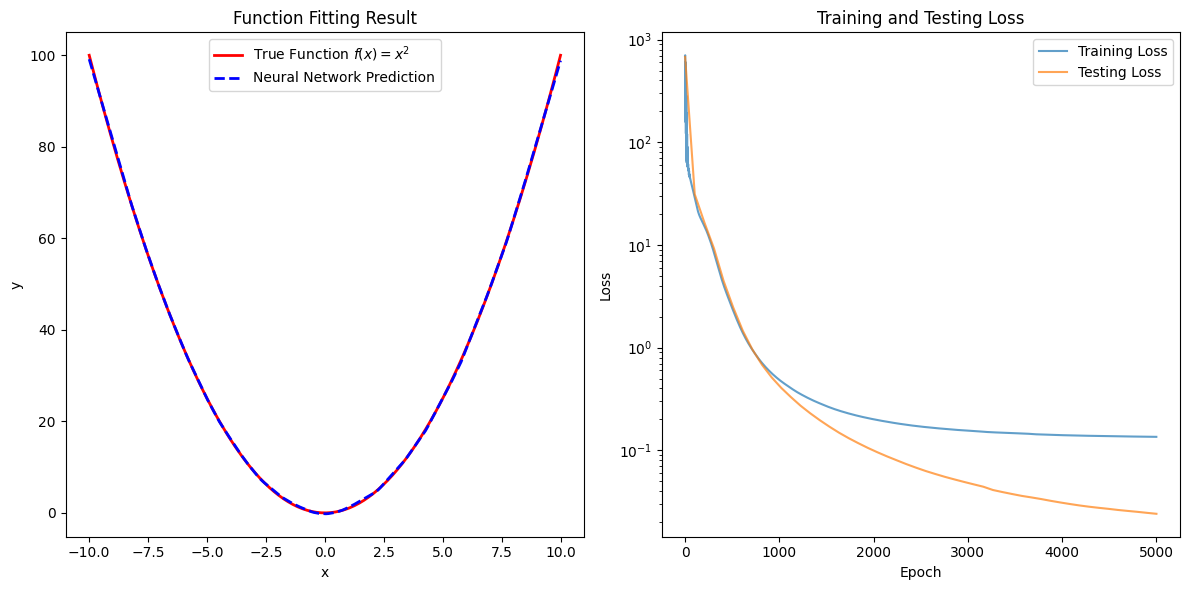

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义目标函数和生成数据
def target_func(x):
    return x**2  # 目标函数

# 生成数据
np.random.seed(42)
n_train = 1000   # 训练样本数
n_test = 200     # 测试样本数
noise_std = 0.5  # 噪声标准差

# 生成训练数据（保留噪声）
x_train = np.random.uniform(-10, 10, size=(n_train, 1))
y_train = target_func(x_train) + np.random.normal(0, noise_std, size=(n_train, 1))

# 生成测试数据（无噪声）
x_test = np.linspace(-10, 10, n_test).reshape(-1, 1)
y_test = target_func(x_test)

# 2. 网络参数优化
hidden_size = 128      # 隐藏层神经元数量
learning_rate = 0.001  # 学习率
epochs = 5000          # 训练轮次

# He初始化（针对ReLU激活函数）
W1 = np.random.randn(1, hidden_size) * np.sqrt(2.0 / 1)            # 输入层权重初始化
b1 = np.zeros((1, hidden_size))                                    # 隐藏层偏置
W2 = np.random.randn(hidden_size, 1) * np.sqrt(2.0 / hidden_size)  # 输出层权重初始化
b2 = np.zeros((1, 1))                                              # 输出层偏置

# 3. 训练网络
train_losses = []
test_losses = []

# 动量参数初始化
v_W1 = np.zeros_like(W1)
v_b1 = np.zeros_like(b1)
v_W2 = np.zeros_like(W2)
v_b2 = np.zeros_like(b2)
momentum = 0.9  # 动量系数

for epoch in range(epochs):
    # 前向传播
    z1 = x_train.dot(W1) + b1
    h = np.maximum(z1, 0)  # ReLU激活
    y_pred = h.dot(W2) + b2
    
    # 计算损失
    loss = np.mean(0.5 * np.square(y_pred - y_train))
    train_losses.append(loss)
    
    # 反向传播
    error = (y_pred - y_train) / n_train  # 归一化误差
    
    # 计算输出层梯度
    dW2 = h.T.dot(error)
    db2 = np.sum(error, axis=0, keepdims=True)
    
    # 计算隐藏层梯度
    d_h = error.dot(W2.T)
    d_relu = d_h * (h > 0)  # ReLU梯度
    dW1 = x_train.T.dot(d_relu)
    db1 = np.sum(d_relu, axis=0, keepdims=True)
    
    # 动量更新
    v_W1 = momentum * v_W1 - learning_rate * dW1
    v_b1 = momentum * v_b1 - learning_rate * db1
    v_W2 = momentum * v_W2 - learning_rate * dW2
    v_b2 = momentum * v_b2 - learning_rate * db2
    
    W1 += v_W1
    b1 += v_b1
    W2 += v_W2
    b2 += v_b2
    
    # 评估测试集（降低频率）
    if epoch % 100 == 0:
        z1_test = x_test.dot(W1) + b1
        h_test = np.maximum(z1_test, 0)
        y_test_pred = h_test.dot(W2) + b2
        test_loss = np.mean(0.5 * np.square(y_test_pred - y_test))
        test_losses.append(test_loss)
        
        # 打印训练信息
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Train Loss: {loss:.4f}, Test Loss: {test_loss:.4f}")

# 4. 可视化结果
plt.figure(figsize=(12, 6))

# 绘制函数拟合
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x_test, y_test, 'r-', label='True Function $f(x)=x^2$', linewidth=2)
ax1.plot(x_test, y_test_pred.reshape(-1), 'b--', label='Neural Network Prediction', linewidth=2)
ax1.set_title('Function Fitting Result')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

# 绘制损失曲线
ax2 = plt.subplot(1, 2, 2)
ax2.plot(train_losses, label='Training Loss', alpha=0.7)
ax2.plot(np.linspace(0, epochs, len(test_losses)), test_losses, label='Testing Loss', alpha=0.7)
ax2.set_title('Training and Testing Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_yscale('log')
ax2.legend()

plt.tight_layout()
plt.show()